In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv(
    '/Users/mohamedsabeer/Desktop/TS & NLP/AirPassengers.csv',
    parse_dates=["Month"],
    index_col="Month"
)

data.columns = ["Passengers"]

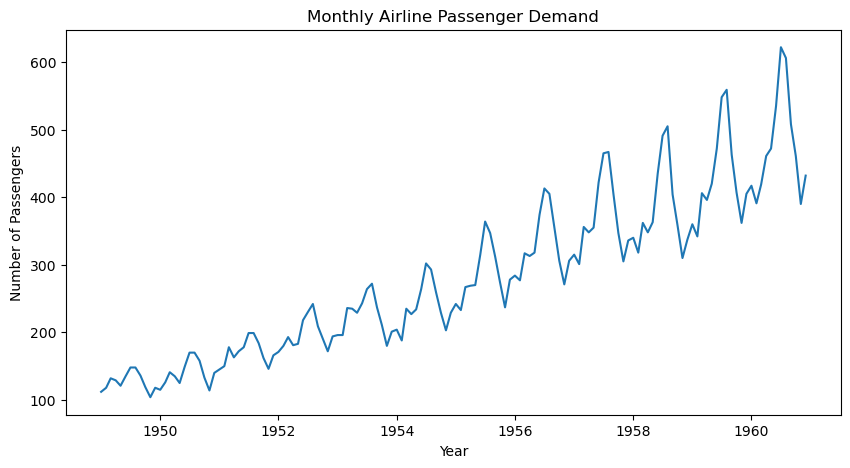

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(data["Passengers"])
plt.title("Monthly Airline Passenger Demand")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

In [14]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("Data is Stationary\n")
    else:
        print("Data is Non-Stationary\n")

print("ADF Test on Original Data")
adf_test(data["Passengers"])

ADF Test on Original Data
ADF Statistic: 0.8153688792060523
p-value: 0.991880243437641
Data is Non-Stationary



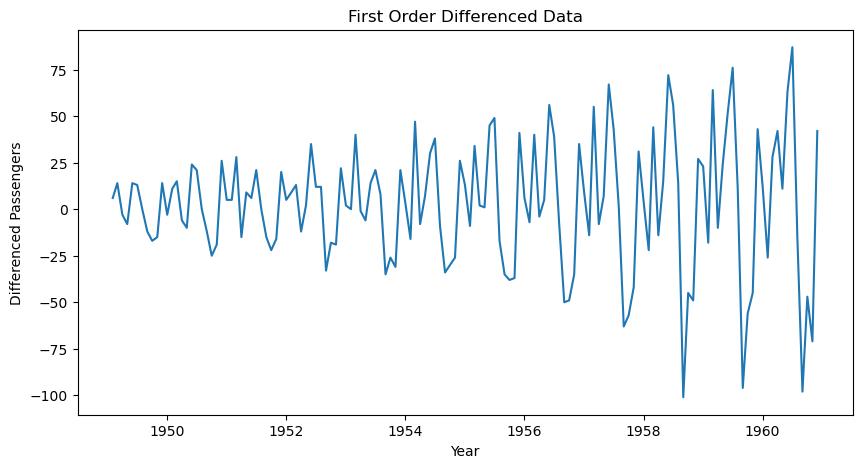

In [15]:
data_diff = data["Passengers"].diff().dropna()

plt.figure(figsize=(10, 5))
plt.plot(data_diff)
plt.title("First Order Differenced Data")
plt.xlabel("Year")
plt.ylabel("Differenced Passengers")
plt.show()

In [16]:
print("ADF Test after Differencing")
adf_test(data_diff)

train = data.iloc[:-12]
test = data.iloc[-12:]

model = ARIMA(train["Passengers"], order=(2, 1, 2))
model_fit = model.fit()

print(model_fit.summary())

forecast = model_fit.forecast(steps=12)

mae = mean_absolute_error(test["Passengers"], forecast)
rmse = np.sqrt(mean_squared_error(test["Passengers"], forecast))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

ADF Test after Differencing
ADF Statistic: -2.829266824169988
p-value: 0.05421329028382705
Data is Non-Stationary

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -607.782
Date:                Fri, 06 Feb 2026   AIC                           1225.563
Time:                        16:40:21   BIC                           1239.939
Sample:                    01-01-1949   HQIC                          1231.405
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6660      0.024     68.561      0.000       1.618       1.714
ar.L2         -0

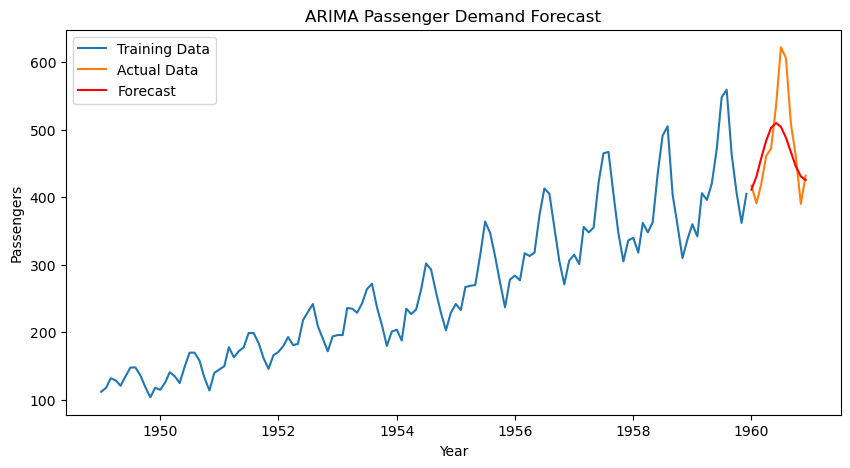

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(train["Passengers"], label="Training Data")
plt.plot(test["Passengers"], label="Actual Data")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.title("ARIMA Passenger Demand Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [18]:
final_model = ARIMA(data["Passengers"], order=(2, 1, 2))
final_model_fit = final_model.fit()

future_forecast = final_model_fit.forecast(steps=12)

print("\nFuture Passenger Demand Forecast:")
print(future_forecast)


Future Passenger Demand Forecast:
1961-01-01    439.855516
1961-02-01    465.297511
1961-03-01    500.666818
1961-04-01    535.971475
1961-05-01    561.688188
1961-06-01    571.310829
1961-07-01    562.969724
1961-08-01    539.726763
1961-09-01    508.526517
1961-10-01    478.147051
1961-11-01    456.748555
1961-12-01    449.699387
Freq: MS, Name: predicted_mean, dtype: float64


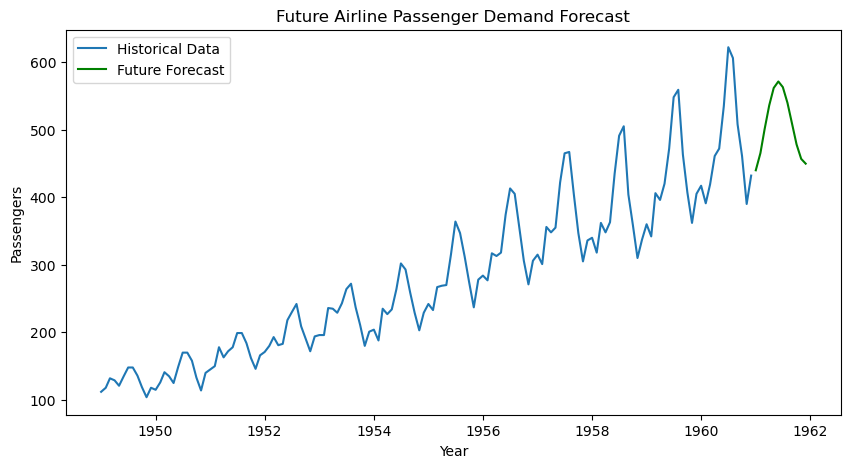

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(data["Passengers"], label="Historical Data")
plt.plot(future_forecast, label="Future Forecast", color="green")
plt.title("Future Airline Passenger Demand Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()